# Gotta lock those centroids down

In [15]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, plot_confusion_matrix
import matplotlib.cm as cm

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

#Read-in data
X = pd.read_csv('data/X_df.csv', index_col=0)
actual_centroids = pd.read_csv('data/y_df.csv')

from test_scripts.test_class import Test
test = Test()

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,13.266656,24.830408,1.061318,1.960450,-5.942332,30.549216,23.250589,10.629714,6.487055,11.306626,...,10.435615,8.443410,-12.655308,-22.494597,-0.352962,-21.611641,10.447188,-12.278723,5.357745,-4.055165
1,1.322632,10.520578,11.356801,16.816463,-3.695731,11.871019,-12.112294,2.663980,-2.921540,9.875639,...,2.944083,0.041347,-1.824593,16.757673,-2.427708,12.084092,3.953355,13.965577,-7.035710,2.597038
2,10.015847,-2.974699,-10.223170,9.359723,6.352669,14.769707,-8.369419,13.447267,4.747191,-7.738804,...,-14.432097,3.154791,-15.260288,11.198960,-12.365462,23.740903,-0.429654,15.095064,1.870938,1.835616
3,1.321069,-17.455019,-12.064625,9.718215,-13.290981,4.449729,2.125485,-8.063754,1.379909,-4.030820,...,14.457236,12.990461,0.492134,-15.891490,18.429554,1.693473,-23.848569,4.649575,-5.816612,13.083350
4,-1.145148,1.453144,1.483568,-4.636443,5.149766,3.002794,-0.286670,12.079819,6.373731,-15.992456,...,20.683788,2.114330,-12.003149,6.420158,8.335073,-15.434024,-8.720679,-6.561897,7.173689,-1.765932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.256996,-2.568842,-3.425438,0.283605,8.579890,-23.428408,-16.687827,-18.343865,2.470631,6.161407,...,2.189011,-7.521182,15.210058,10.061540,8.838466,9.863936,-8.027693,18.303311,-2.259259,9.225479
9996,-1.853808,-5.932730,-6.741891,-3.233345,-7.872409,5.074178,-1.718621,-7.934209,-4.246250,7.965659,...,2.088923,-0.137187,-0.093262,21.011868,-6.938452,-13.732166,10.846059,-13.803776,1.967471,-14.241889
9997,-11.673648,3.926739,6.495913,8.430028,15.990418,-12.354751,6.851711,0.148854,-1.715449,1.969337,...,-8.031982,5.359373,-8.047770,-8.265810,23.456657,-20.259314,-14.400381,11.407069,3.357539,-8.510924
9998,16.398198,0.156397,-2.965037,14.286608,21.029601,-1.617978,-9.555139,6.990582,-10.875433,3.153149,...,1.613016,-5.313988,-0.125769,4.259893,-6.882087,13.553455,4.740237,-1.432796,-25.038369,-1.047117


### Create an Elbow Curve plot

- For k from 2 to 10:
  - fit a `KMeans` object with `k` clusters and `random_state` 301
  - save the sum of squared distance for all points to the centroids of their respective cluster in a list
    - *Hint*: [read the docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    
    
- Graph the values you saved on the `Y axis` w/ `k` on the `X axis`

In general, what type of information do you diagnose from an Elbow Curve plot?

For this specific graph, what conclusions can you make?

In [17]:
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [18]:
#Your work here
inertias = {}
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=301)
    km.fit(X_sc)
    inertias[k] = km.inertia_
    

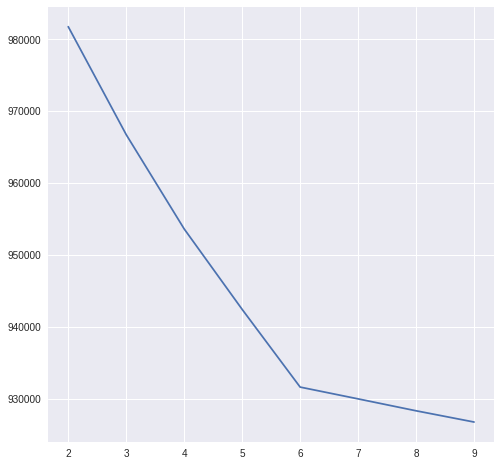

In [19]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(list(inertias.keys()), list(inertias.values()))

### Further diagnosis with silhouette plots

Use the code below to create a silhouette plot for `k` from 2 to 8

What conclusions can you draw?

What implications does this have for interpreting the Elbow Curve graph?

In [20]:
def silhouette_plot(n_clusters, cluster_labels, X):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.018040798233993297


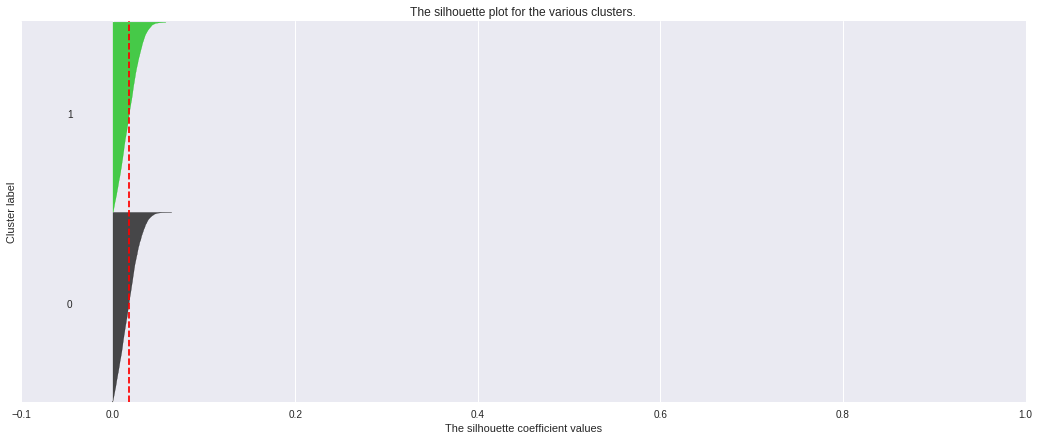

For n_clusters = 3 The average silhouette_score is : 0.01910412477234789


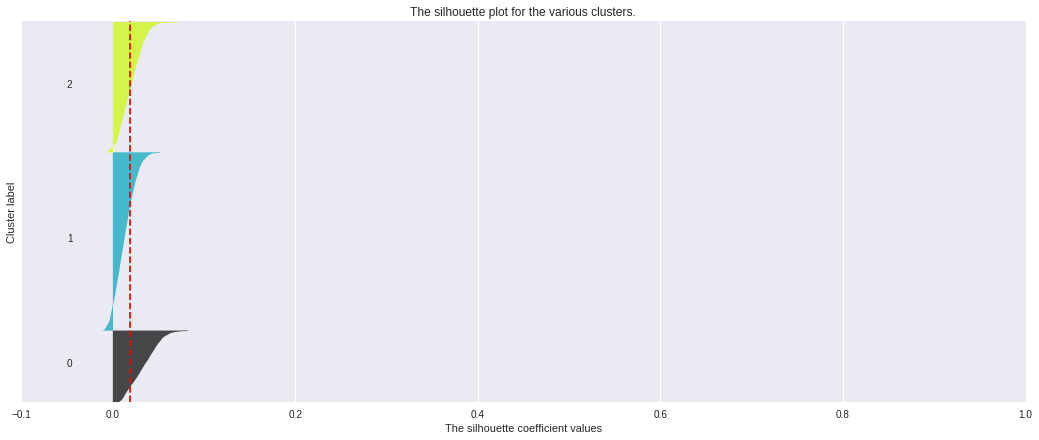

For n_clusters = 4 The average silhouette_score is : 0.021247048640946075


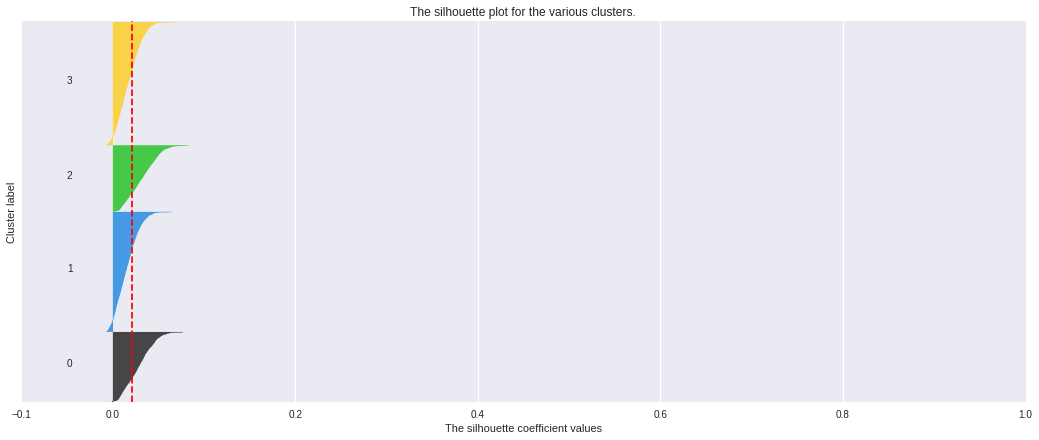

For n_clusters = 5 The average silhouette_score is : 0.022889131427056616


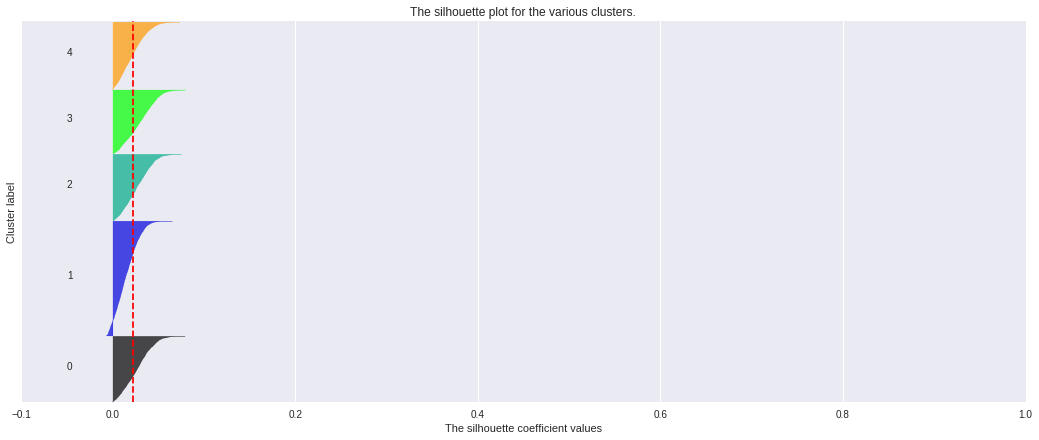

For n_clusters = 6 The average silhouette_score is : 0.025311419516870687


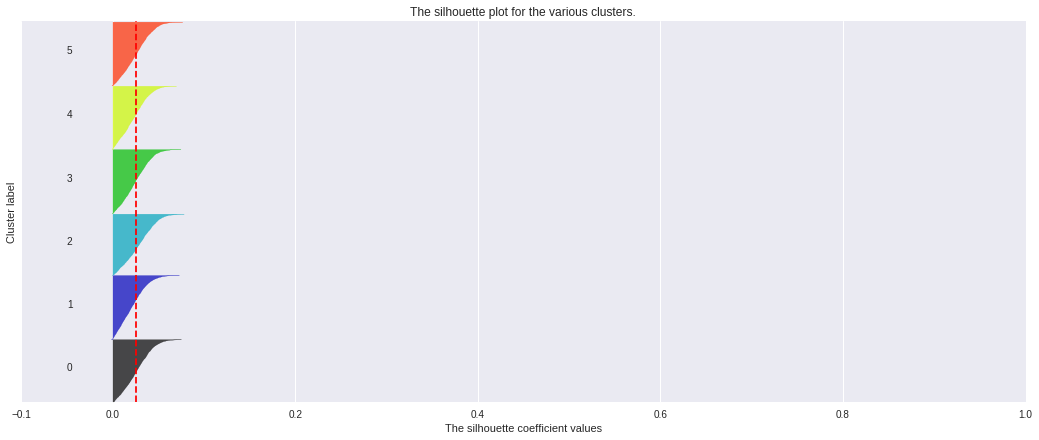

For n_clusters = 7 The average silhouette_score is : 0.02144981872995545


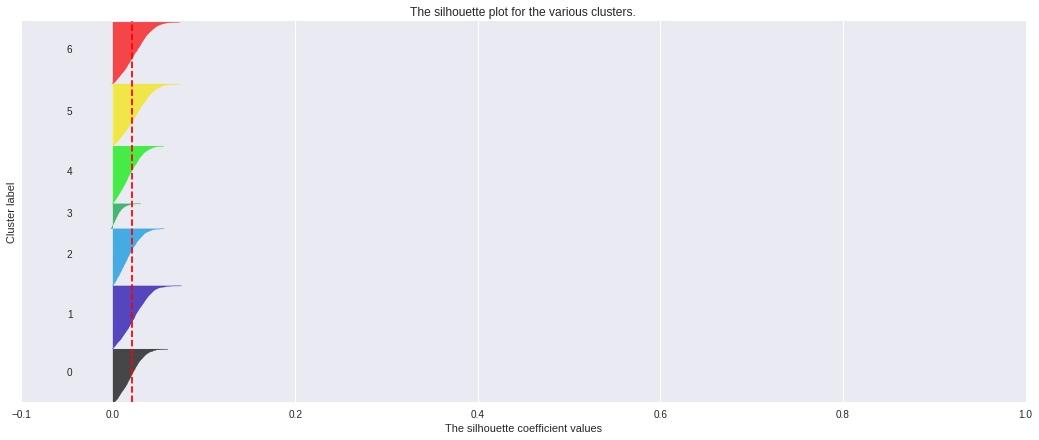

For n_clusters = 8 The average silhouette_score is : 0.019258820278869142


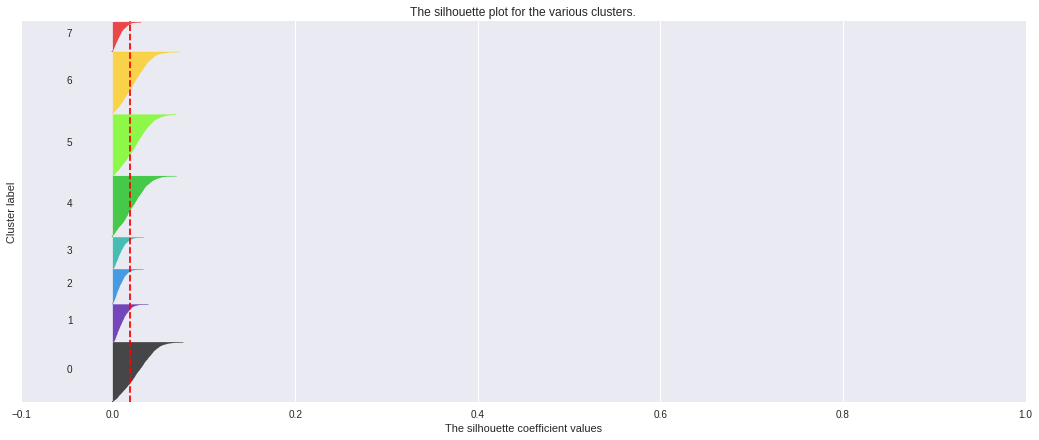

For n_clusters = 9 The average silhouette_score is : 0.016412039395330348


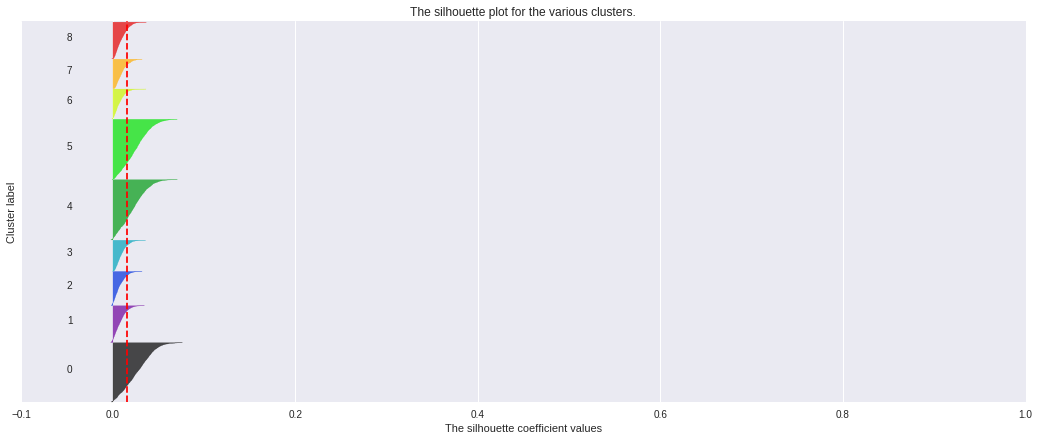

In [21]:
# Your work here
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=301)
    km.fit_predict(X_sc)
    silhouette_plot(k, km.labels_, X_sc)